# Group 5 - Predicting a Country's S&P rating

# Table of Content 
1. Discription
2. Data Understanding 
3. Problem faced and solution approch
4. Web Scraping
5. Data Preprocessing 
6. Model Building
    - Prob
    - Time series AR model
7. Result 
8. Interpretation section
9. Refrences

## 1. Discription

### What is S&P Rating 
- S&P Global Ratings is an American credit rating agency and a division of S&P Global that publishes financial research and analysis on stocks, bonds, and commodities. S&P is considered the largest of the Big Three credit-rating agencies, which also include Moody's Investors Service and Fitch Ratings



## 2. Data Understanding

#### Attribute 1 - Rating 

| Rating | Type | - |
| --- | --- | --- |
| AAA| Investment | Extremely strong    |
| AA+, AA, AA-  | Investment | Very Strong  |
| BBB+, BBB, BBB-  | Investment | Strong  |
| BB+, BB, BB-  | Speculative | Adequate  |
| B+, B, B-  | Speculative | Faces major future uncertainties  |
| CCC | Speculative | Currently vulnerable  |
| CC | Speculative | Currently highly vulnerable   |
| C | Speculative | Has filed bankruptcy petition   |
| D | Speculative | In defaulf  |





| Rating | Numeric Rating | Type |
| ---- | ---- | ---- |
| AAA | 22 | Top Notch for investement  |
| AA+ | 21 | Invest UNDER OBSERVATION  |
| AA | 20 | Invest UNDER OBSERVATION  |
| AA- | 19 | Invest UNDER OBSERVATION  |
| A+ | 18 | Invest UNDER OBSERVATION  |
| A | 17 | Invest UNDER OBSERVATION  |
| A- | 16 | Invest UNDER OBSERVATION  |
| BBB+ | 15 | Invest UNDER OBSERVATION  |
| BBB | 14 | Invest UNDER OBSERVATION  |
| BBB- | 13 | Invest UNDER OBSERVATION  |
| BB+ | 12 | Bad for investment  |
| BB | 11 | Bad for investment  |
| BB- | 10 | Bad for investment  |
| B+ | 9 | Bad for investment  |
| B | 8 | Bad for investment  |
| B- | 7 | Bad for investment  |
| CCC+ | 6 | Bad for investment  |
| CCC | 5 | Bad for investment  |
| CCC- | 4 | Bad for investment  |
| CC | 3 | Bad for investment  |
| C | 2 | Bad for investment |
| D | 1 | Bad for investment  |


#### Attribute 2 - Outlook

| Outlook type | Interpretation | 
| ----- | ----- |
| Positive | rating may be raised next month  | 
| Negative | rating may be lowered next month | 
| Stable | rating is not likely to change  | 


#### Attribute 3 - Date
- This attribute specify the date at which rating is catlulated



#### Example 

-  For any country with rating BBB in 2009 means, that particular country will repay the debt has a chance of 0.55% 

| Year |   AAA  |    AA  |    A |     BBB |     BB |     B  |    CCC/C |
| --- | --- | --- | --- | --- | --- | --- | --- | 
|2009  |    0.00  |  0.00  |  0.22  |  0.55  |  0.75  |  11.01  |  49.46 |
|2010  |   0.00   | 0.00  |  0.00  |  0.00  |  0.58  |  0.87   | 22.73 |
|2011  |  0.00   | 0.00  |  0.00  |  0.07  |  0.00  |  1.68   | 16.42 |
|2012  |  0.00   | 0.00  |  0.00  |  0.00  |  0.30  |  1.58   | 27.52 |
|2013  |  0.00   | 0.00  |  0.00  |  0.00  |  0.10  |  1.65   | 24.67 |
|2014  |  0.00   | 0.00  |  0.00  |  0.00  |  0.00  |  0.78   | 17.51 |
|2015  |  0.00   | 0.00  |  0.00  |  0.00  |  0.16  |  2.41   | 26.67 |
|2016  |  0.00   | 0.00  |  0.00  |  0.06  |  0.47  |  3.75   | 33.33 |




## 3. Problem faced and solution approch

 - Very less number of data were available for applying any kind of machine learning model. So we used web scraping techinque to get more data from offical website of S&P Global rating 
 
 Example - India 
 
 https://tradingeconomics.com/india/rating

## 4. Web Scraping 

In [ ]:
# Refrence
# https://towardsdatascience.com/scraping-table-data-from-websites-using-a-single-line-in-python-ba898d54e2bc

import pandas as pd
import numpy as np
import time 
start = time.time()

dflink = pd.read_excel('link.xlsx')

a = "XX"
addrow1 = {
    'Agency' : [a],
    'Rating' : ['a'],
    'Outlook': ['b'],
    'Date' : ['c'],
    'Country' : ['d'],
    'ISOcode' : ['e']
    
}

df1 = pd.DataFrame(addrow1)

i = 0
while i <2: 
    URL = dflink.Link[i]
    pd.read_html(URL)

    tables = pd.read_html(URL)
    #print(tables[0])
    print(URL)
    #print(len(tables))
    dftemp = tables[0]
    #print(dftemp)
    
    array1 = np.repeat(dflink.Country[i], len(tables[0]))
    dftemp1 = dftemp.assign(Country = array1)
    #print(dftemp1)
     
    array2 = np.repeat(dflink.ISOcode[i], len(tables[0]))
    dftemp2 = dftemp1.assign(ISOcode = array2)
    #print(dftemp2)
    
    #print(dftemp1)

    df1 = df1.append(dftemp2)

    print(len(tables[0]), i)
    i = i +1


df1.drop(1)
df1.to_excel("fresh_data_after_web_scraping.xlsx")
end = time.time()
print(start)
print(end)
print(end-start)
df1

https://tradingeconomics.com/albania/rating
6 0
https://tradingeconomics.com/andorra/rating
18 1
1627464791.767248
1627464807.5778704
15.810622453689575


,Agency,Rating,Outlook,Date,Country,ISOcode
0,XX,a,b,c,d,e
0,S&P,B+,Stable,Feb 05 2016,Albania,ALB
1,S&P,B,Positive,Oct 10 2014,Albania,ALB
2,S&P,B,Stable,Apr 11 2014,Albania,ALB
3,S&P,B,Negative,Dec 06 2013,Albania,ALB
4,S&P,B+,Stable,Apr 19 2010,Albania,ALB
5,Moody's,B1,Stable,Jun 29 2007,Albania,ALB
0,S&P,BBB,Stable,Apr 24 2020,Andorra,AND
1,S&P,BBB,Positive,Jul 19 2019,Andorra,AND
2,Fitch,BBB+,Stable,Aug 10 2018,Andorra,AND


## 5. Data Preprocessing

## 6. Data Visualization

### a. Geographical Heat Plot

In [ ]:
import plotly.express as px
import plotly.express as p
import pandas as pd

df1 = pd.read_excel("geo_heat_plot.xlsx")
# df1 = pd.read_excel("geo_heat_plot.xlsx", sheet_name = "my_sheet")

df1.head()

i = 1
while i<2: #increase i for number of graphs required
    if i == 1:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 04/2010", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 2:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 09/2011", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 3:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 12/2011", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 4:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 01/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 5:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 02/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 6:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 03/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 7:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 06/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 8:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 07/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 9:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 10/2012", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 10:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 01/2013", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
    if i == 11:
        fig = px.choropleth(df1, locations="ISOcode", color="S&P rating on 03/2013", hover_name="country", color_continuous_scale=px.colors.sequential.Plasma)
 
    i = i+1
    fig.show()

### b. Stock X-Y Plot

In [ ]:
import pandas  as pd

df = pd.read_excel("xy_plot.xlsx")
# df = pd.read_excel("xy_plot.xlsx", sheet_name="name")
df.head()

import plotly.graph_objects as go
import numpy as np

x = df.Date
y = df.Rating
fig = go.Figure()
title = 'Main Source for News'

fig.add_trace(go.Scatter(x=x, y=y, name="India", line_shape='hvh'))



fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16,))

fig.show()



df

,Date,Rating
0,1990-09-13,14
1,1991-03-07,13
2,1991-05-29,12
3,1991-09-29,12
4,1996-10-01,12
5,1997-10-06,12
6,1998-05-22,12
7,1998-10-22,11
8,2000-03-20,11
9,2000-10-10,11


# 7. Model Building 


# Bayes Classification

131
{'ALB': [0, 1, 2, 3, 4], 'AND': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'AGO': [20, 21, 22, 23, 24, 25, 26, 27, 28], 'ARG': [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], 'ABW': [65, 66, 67, 68, 69, 70, 71, 72, 73, 74], 'AUS': [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87], 'AUT': [88, 89, 90, 91, 92], 'AZE': [93, 94, 95, 96, 97, 98, 99, 100, 101], 'BHS': [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114], 'BHR': [115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130], 'BGD': [131], 'BRB': [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], 'BLR': [151, 152, 153, 154, 155, 156, 157, 158, 159, 160], 'BEL': [161, 162, 163, 164, 165, 166, 167, 168], 'BLZ': [169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 1

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning:

divide by zero encountered in log

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

divide by zero encountered in true_divide

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

invalid value encountered in true_divide

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning:

divide by zero encountered in log

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

divide by zero encountered in true_divide

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:454: RuntimeWarning:

invalid value encountered in true_divide

c:\users\asaro\appdata\local\programs\python\python37\lib\

108
371
371
{'ALB': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'AND': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'AGO': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'ARG': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'ABW': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'AUS': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'AUT': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'AZE': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'BHS': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'BHR': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'BGD': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'BRB': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'BLR': {'original_values': [7, 9], 'predicted_values': array([4, 4])}, 'BEL': {'original_values': [7, 9], 'predicted_values': array([4,

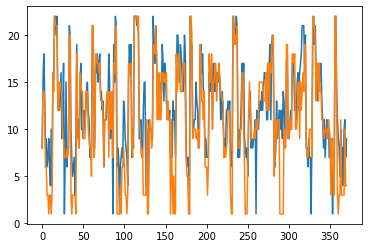

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix





my_sheet = 'S&P rating' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'fresh-data-1.xlsx' # change it to the name of your excel file
df = pd.read_excel(file_name, sheet_name = my_sheet)
df.head()






df.drop(["Country","Agency","Date_of_Rating","No_of_Months","Start_Date"],axis='columns',inplace=True)
#droping all unnecessary attributes
df.head()




iso_code=df["ISOcode"].unique() #different iso_code
print(len(iso_code))
dit=dict.fromkeys(iso_code,[])
for index,row in df.iterrows():
  dit[row["ISOcode"]]=dit.get(row["ISOcode"],0)+[index]
print(dit) # map with country as key and list of indices from dataset as values





dummies = pd.get_dummies(df.Outlook)
su = dummies.rename(columns={dummies.columns[1]: 'new',dummies.columns[3]: 'new1'})
su.drop(["new","new1"],axis='columns',inplace=True)
su.head()




df = pd.concat([df,su],axis='columns') # changing outlook attribute ategorical value to binary values with new attribute NEgative, Positive and stable
df.head(3)



df.drop(['Outlook',"Rating"],axis='columns',inplace=True)
df = df.rename(columns={df.columns[1]: 'Rating'})
df.head(3)




df.Rating = df.Rating.fillna(10)
target=df["Rating"]
df.drop(["Rating",],axis='columns',inplace=True)
df2=df.copy()
df2.drop(["ISOcode"],axis='columns',inplace=True)
df2.head()



count=0
#iso_code=["AND"]
original_values=[]
predicted_values=[]
map=dict.fromkeys(iso_code,{"original_values":[],"predicted_values":[]})
for key,value in dit.items():
  if len(value)>4:
   count+=1
   #print(key)
   temp_df=df2[value[1]:value[-1]+1]
   #print(temp_df)
   temp_df=temp_df.astype('int')
   temp_target=target[value[1]:value[-1]+1]
   #print(temp_target)
   try:
     temp_target.replace({"SD":1}, inplace=True)
   except:
     pass
   temp_target=temp_target.astype('int')
   X_train, X_test, y_train, y_test = train_test_split(temp_df,temp_target,test_size=0.2)
   model = GaussianNB()
   model.fit(X_train,y_train)
   model.score(X_test,y_test)
   predicted_value=model.predict(X_test[:10])
   predicted_values+=predicted_value.tolist()
   #print(value)
   original_value=y_test.tolist()
   original_values+=original_value
   #print(original_value)
   map[key]["original_values"]=original_value
   map[key]["predicted_values"]=predicted_value
print(count)
print(len(predicted_values))
print(len(original_values))
print(map)




x_points=[i for i in range(len(original_values))]
plt.plot(x_points,original_values,
         x_points,predicted_values)




print("Accuracy score:",accuracy_score(original_values,predicted_values,))
print(confusion_matrix(original_values,predicted_values,))

# Time Series Forcasting Model

### Diffrent Types of time series model

1. Autoregression Models (AR Models) 
2. Moving averages Models (MA Models)
3. Autoregressive Moving Averages (ARMA Models)
4. Autoregressive Integrated Moving Averages (ARIMA Models)

### What is time series and why to use?

- A time series is a set of observations taken at a specified time interval


### Checking Stationarity
- Constant Mean 
- Constant Variance 
- No Seasonality

   If any time series data set satisfy above mentioned pionts then it is stationart and time series model can be used on it

### Time Series Analysis can be used in:

- Economic Forecasting
- Sales Forecasting
- Budgetary Analysis
- Stock Market Analysis
- Yield Projections
- Inventory assessments
- Workload projections
- Demographics projections
- Weather patterns and forecasts




# AR Model

### AutoRegression Model
AR Model of order 1
$$  
         \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1}
$$

AR Model of order 2

$$
        \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1} + \beta_{2}*\Upsilon _{t-2}
$$
AR Model of order p

$$
        \Upsilon_{t} = \beta_{0}+ \beta_{1}*\Upsilon _{t-1} + \beta_{2}*\Upsilon _{t-2}  . . . . + \beta_{p}*\Upsilon _{t-p}
$$


- <B>Stationarity of the time-series data</B>: The stationarity of the data can be found using adfuller class of statsmodels.tsa.stattools module. The value of p-value is used to determine whether there is stationarity. If the value is less than 0.05, the stationarity exists.
- <B>Order of AR model to be trained</B>: The order of AR model is determined by checking the partial autocorrelation plot. The plot_pacf method of statsmodels.graphics.tsaplots is used to plot.

---------##########################----------
Number of data points of Albania are 5
---------##########################----------
Number of data points of Andorra are 15
[[19]
 [20]
 [20]
 [19]
 [18]
 [17]
 [16]
 [15]
 [14]
 [13]
 [13]
 [13]
 [14]
 [14]
 [14]]
Predicted S&P rating of Andorra in next month is [14.]
---------##########################----------
Number of data points of Angola are 9
[[ 9]
 [10]
 [ 9]
 [ 9]
 [ 8]
 [ 8]
 [ 7]
 [ 7]
 [ 6]]
Predicted S&P rating of Angola in next month is [7.]
---------##########################----------
Number of data points of Argentina are 36
[[11]
 [10]
 [10]
 [ 9]
 [ 8]
 [ 8]
 [ 7]
 [ 6]
 [ 3]
 [ 1]
 [ 7]
 [ 8]
 [ 9]
 [ 9]
 [ 8]
 [ 7]
 [ 8]
 [ 8]
 [ 7]
 [ 6]
 [ 4]
 [ 4]
 [ 1]
 [ 7]
 [ 8]
 [ 9]
 [ 9]
 [ 8]
 [ 7]
 [ 1]
 [ 4]
 [ 1]
 [ 3]
 [ 4]
 [ 1]
 [ 6]]
Predicted S&P rating of Argentina in next month is [3.]
---------##########################----------
Number of data points of Aruba are 10
[[16]
 [16]
 [16]
 [15]
 [15]
 [15]
 [15]
 [15

c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:81: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
c:\users\asaro\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


[ 8.  8.  9.  9. 10. 10.]
---------##########################----------
Number of data points of Grenada are 1
---------##########################----------
Number of data points of Guatemala are 12
[[11]
 [11]
 [10]
 [11]
 [11]
 [11]
 [11]
 [11]
 [11]
 [10]
 [10]
 [10]]
Predicted S&P rating of Guatemala in next month is [11.]
---------##########################----------
Number of data points of Honduras are 10
[[ 9]
 [ 9]
 [ 8]
 [ 8]
 [ 9]
 [ 9]
 [ 8]
 [ 9]
 [ 9]
 [10]]
Predicted S&P rating of Honduras in next month is [9.]
---------##########################----------
Number of data points of Hong Kong are 22
[[18]
 [18]
 [17]
 [17]
 [17]
 [17]
 [17]
 [17]
 [18]
 [18]
 [17]
 [17]
 [18]
 [18]
 [19]
 [19]
 [20]
 [20]
 [21]
 [22]
 [22]
 [21]]
Predicted S&P rating of Hong Kong in next month is [23.]
---------##########################----------
Number of data points of Hungary are 29
[[12]
 [12]
 [12]
 [12]
 [13]
 [13]
 [14]
 [15]
 [16]
 [16]
 [15]
 [15]
 [15]
 [15]
 [14]
 [13]
 [13]
 [

Predicted S&P rating of Russia in next month is [12.]
---------##########################----------
Number of data points of Rwanda are 9
[[8]
 [8]
 [8]
 [9]
 [9]
 [8]
 [8]
 [9]
 [9]]
Predicted S&P rating of Rwanda in next month is [9.]
---------##########################----------
Number of data points of Saudi Arabia are 9
[[17]
 [17]
 [18]
 [19]
 [19]
 [19]
 [19]
 [18]
 [16]]
Predicted S&P rating of Saudi Arabia in next month is [18.]
---------##########################----------
Number of data points of Senegal are 7
[[9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]]
Predicted S&P rating of Senegal in next month is [9.]
---------##########################----------
Number of data points of Serbia are 16
[[ 9]
 [10]
 [10]
 [10]
 [10]
 [10]
 [11]
 [10]
 [10]
 [10]
 [10]
 [10]
 [11]
 [11]
 [12]
 [12]]
Predicted S&P rating of Serbia in next month is [12.]
---------##########################----------
Number of data points of Singapore are 4
---------##########################----------
Number of data

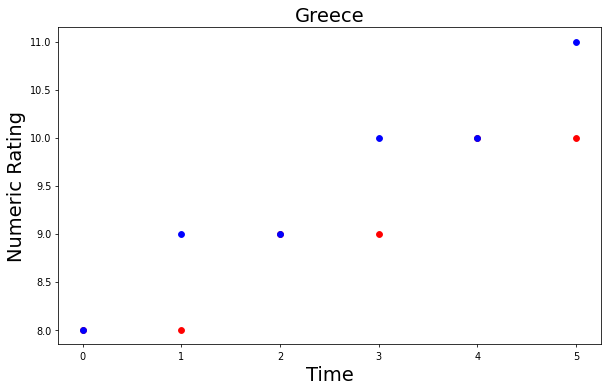

In [ ]:
import pandas  as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import confusion_matrix


my_sheet = 'S&P rating' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'fresh-data-1.xlsx' # change it to the name of your excel file
df = pd.read_excel("fresh-data-1.xlsx", sheet_name = "S&P rating")
df.head()




iso_code=df["ISOcode"].unique() #different iso_code
# print(len(iso_code))
dit=dict.fromkeys(iso_code,[]) 
# print(dit)
for index,row in df.iterrows():
  dit[row["ISOcode"]]=dit.get(row["ISOcode"],0)+[index]
# print(dit) #indices for particalr country



i = 0
for key,value in dit.items():
    try:
        temp_target.replace({"SD":1}, inplace=True)
    except:
        pass
    temp_df=df[value[0]:value[-1]+1]
    #print(key)
#     print(temp_df)
    print("---------##########################----------")
    
    

    count_row = temp_df.shape[0]
    i = count_row +i
#     print(i)
    
    pcountry = temp_df.Country[i - 1]
    pISOcode = temp_df.ISOcode[i - 1]
    print("Number of data points of", pcountry, "are", count_row)
    if count_row > 6:
        date_temp = temp_df.Date_of_Rating
        rating_temp = temp_df.Numeric_Rating    
    
        rating = rating_temp.values
#         print(rating)
        rating = rating.reshape((count_row, 1))
        print(rating)

#         dftest = adfuller(temp_df["Numeric_Rating"], autolag = "AIC")
    
        train = rating[:len(rating)-1]
        model = AutoReg(train,lags=2).fit()
        pred = model.predict(start=len(train), end=len(rating)-1, dynamic=False)
        pred1 = np.ceil(pred)

        print("Predicted S&P rating of",pcountry, "in next month is" , pred1)

            
    if pISOcode == "GRC":
        train = rating[:len(rating)-6]
        test = rating[len(rating)-6:]
        # print(train)
        print(train)
        model1 = AutoReg(train,lags=3).fit()
        # print(model.summary())

        pred_s = model.predict(start=len(train), end=len(rating)-1, dynamic=False)
        pred1_s = np.ceil(pred_s)
        pyplot.figure(figsize=(10, 6), dpi=70)
        
        pyplot.plot(pred1_s, "ro")
        pyplot.plot(test, "ro" ,color = 'blue', )
        
        
        pyplot.xlabel('Time', fontsize=20)
        pyplot.ylabel('Numeric Rating', fontsize=20)
        pyplot.title(pcountry, fontsize=20)
        print(pred1_s)
#         print("Hello Greece")
    
    
print("  ")
print("  ")
print("  ")
print("  ")
print("Actual points - Blue")
print("Predicted points - Red")


In [ ]:
print("Confusion Matrix of Greece")
print(confusion_matrix(test,pred1_s,))

Confusion Matrix of Greece
[[1 0 0 0]
 [1 1 0 0]
 [0 1 1 0]
 [0 0 1 0]]


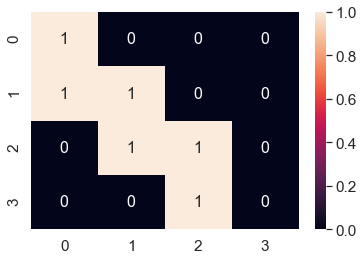

Confusion Matrix of Greece


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[1, 0, 0, 0], [1, 1, 0, 0],[0, 1, 1, 0],[0, 0, 1, 0]]

df_cm = pd.DataFrame(array, range(4), range(4))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
print("Confusion Matrix of Greece")